In [6]:
# install XgBoost
!pip install xgboost

Defaulting to user installation because normal site-packages is not writeable


In [1]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# To suppress scientific notations
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# To tune model, get different metric scores, and split data
from sklearn import metrics
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
)
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# To impute missing values
from sklearn.impute import SimpleImputer

# To oversample and undersample data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# To do hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)

# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To help with model building
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)
from xgboost import XGBClassifier

# To supress warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# importing the primary dataset
path = 'C:\\Users\\Ishaan Shakti\\Documents\\Great Lakes\\6 - Machine Learning - 2\\Project Work - Coded\\EasyVisa.csv'
visa_data = pd.read_csv(path)

In [3]:
# copying data to another variable to avoid any changes to original data
data = visa_data.copy()

## DATA OVERVIEW

In [5]:
# view the first 5 rows of the data
data.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.203,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.650,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.860,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.030,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.390,Year,Y,Certified


In [6]:
# view the last 5 rows of the data
data.tail()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.570,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.790,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.850,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.770,Year,Y,Certified
25479,EZYV25480,Asia,Bachelor's,Y,N,3195,1960,Midwest,70876.910,Year,Y,Certified


In [7]:
# view the shape of the data
data.shape

(25480, 12)

In [8]:
# view the datatypes of the columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


In [9]:
# check for duplicate values
data.duplicated().sum()

0

In [10]:
# check for missing values in the data
data.isnull().sum()

case_id                  0
continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

In [13]:
# statistical summary of the data
data.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
case_id,25480,25480,EZYV01,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
continent,25480,6,Asia,16861,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education_of_employee,25480,4,Bachelor's,10234,NaN,NaN,NaN,NaN,NaN,NaN,NaN
has_job_experience,25480,2,Y,14802,NaN,NaN,NaN,NaN,NaN,NaN,NaN
requires_job_training,25480,2,N,22525,NaN,NaN,NaN,NaN,NaN,NaN,NaN
no_of_employees,25480.000,NaN,NaN,NaN,5667.043,22877.929,-26.000,1022.000,2109.000,3504.000,602069.000
yr_of_estab,25480.000,NaN,NaN,NaN,1979.410,42.367,1800.000,1976.000,1997.000,2005.000,2016.000
region_of_employment,25480,5,Northeast,7195,NaN,NaN,NaN,NaN,NaN,NaN,NaN
prevailing_wage,25480.000,NaN,NaN,NaN,74455.815,52815.942,2.137,34015.480,70308.210,107735.513,319210.270
unit_of_wage,25480,4,Year,22962,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
# Making a list of all categorical variables
cat_col = list(data.select_dtypes("object").columns)

# Printing number of count of each unique value in each column
for column in cat_col:
    print(data[column].value_counts())
    print("-" * 50)

case_id
EZYV01       1
EZYV16995    1
EZYV16993    1
EZYV16992    1
EZYV16991    1
            ..
EZYV8492     1
EZYV8491     1
EZYV8490     1
EZYV8489     1
EZYV25480    1
Name: count, Length: 25480, dtype: int64
--------------------------------------------------
continent
Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: count, dtype: int64
--------------------------------------------------
education_of_employee
Bachelor's     10234
Master's        9634
High School     3420
Doctorate       2192
Name: count, dtype: int64
--------------------------------------------------
has_job_experience
Y    14802
N    10678
Name: count, dtype: int64
--------------------------------------------------
requires_job_training
N    22525
Y     2955
Name: count, dtype: int64
--------------------------------------------------
region_of_employment
Northeast    7195
South        7017
West         6586
Midwest      

In [18]:
# drop "case_id" column
data.drop(["case_id"], axis=1, inplace=True)

## UNIVARIATE ANALYSIS

In [24]:
# function to plot a boxplot and a histogram along the same scale.

def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [26]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

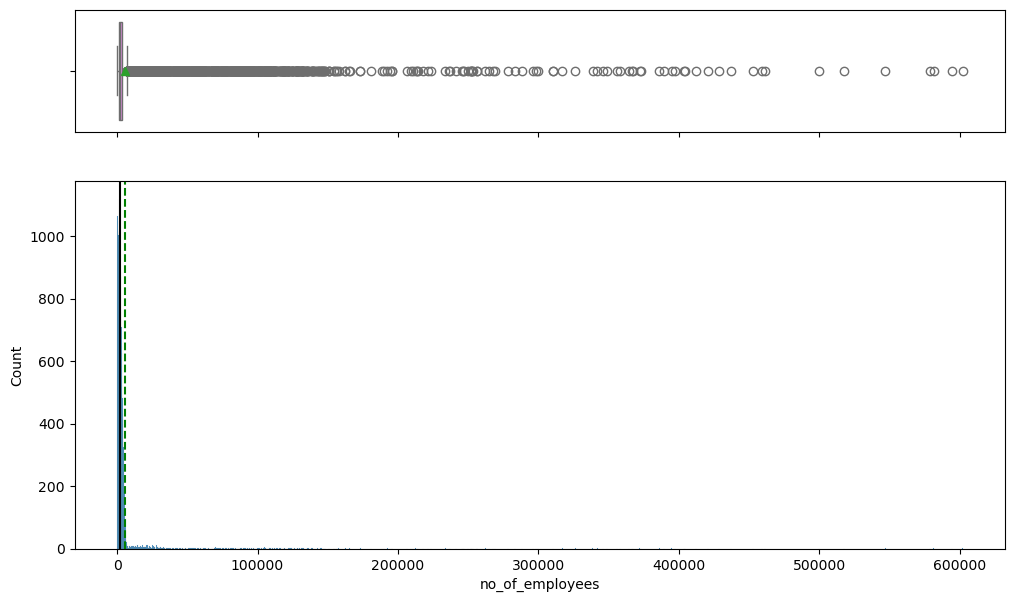

In [27]:
histogram_boxplot(data, "no_of_employees")

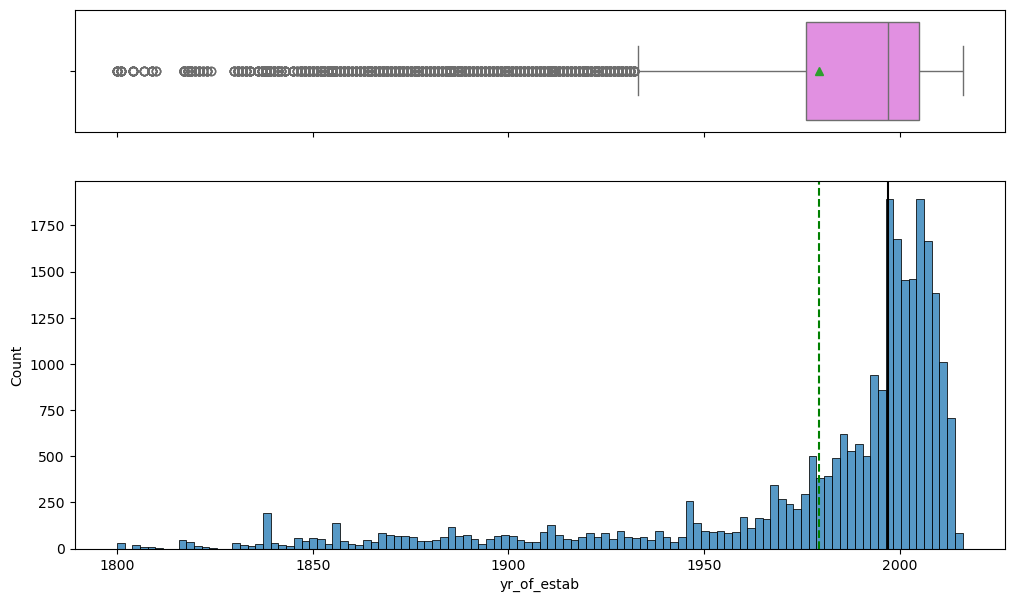

In [28]:
histogram_boxplot(data, "yr_of_estab")

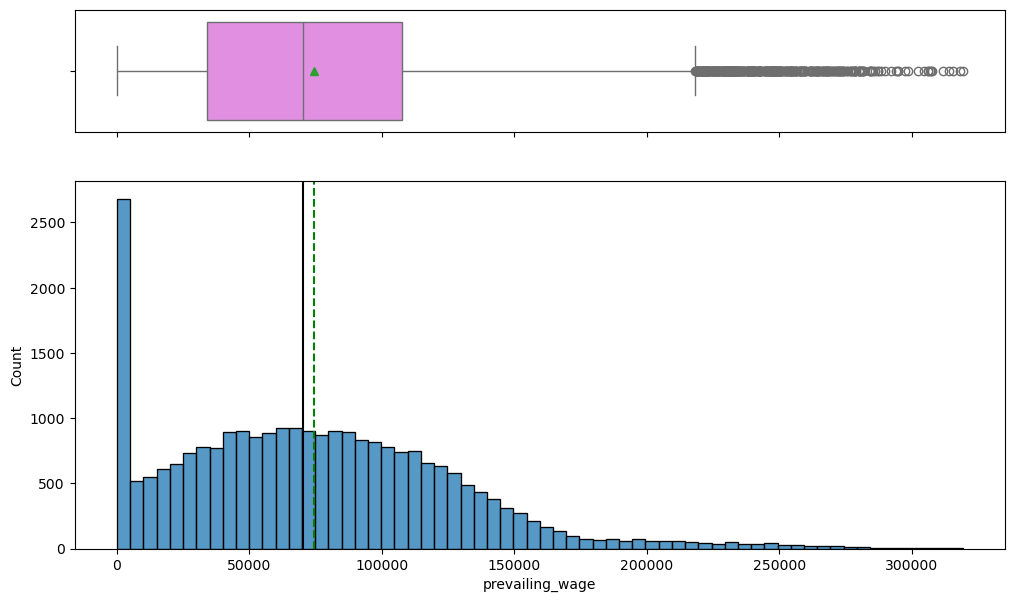

In [31]:
histogram_boxplot(data, "prevailing_wage")

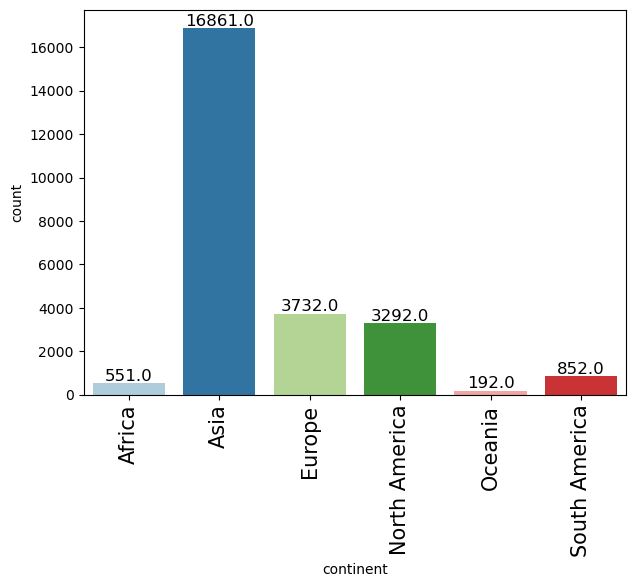

In [32]:
labeled_barplot(data, "continent")

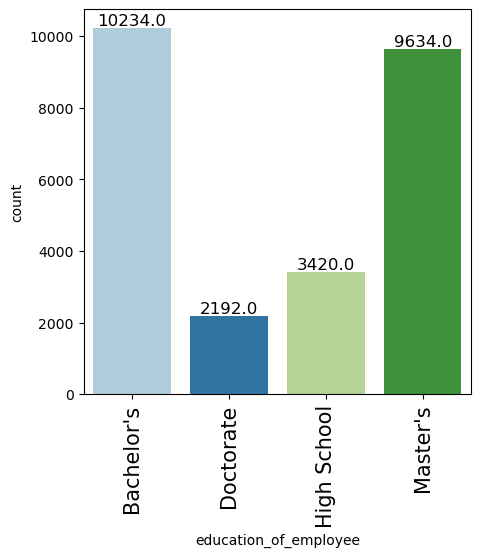

In [34]:
labeled_barplot(data, "education_of_employee")

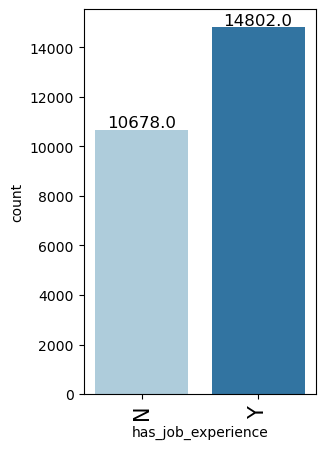

In [36]:
labeled_barplot(data, "has_job_experience")

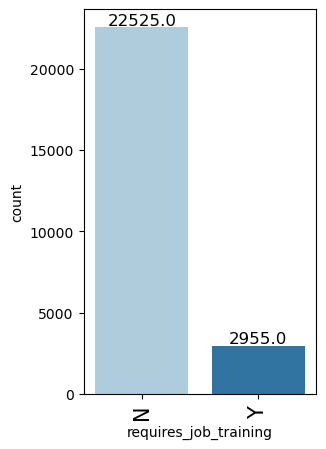

In [37]:
labeled_barplot(data, "requires_job_training")

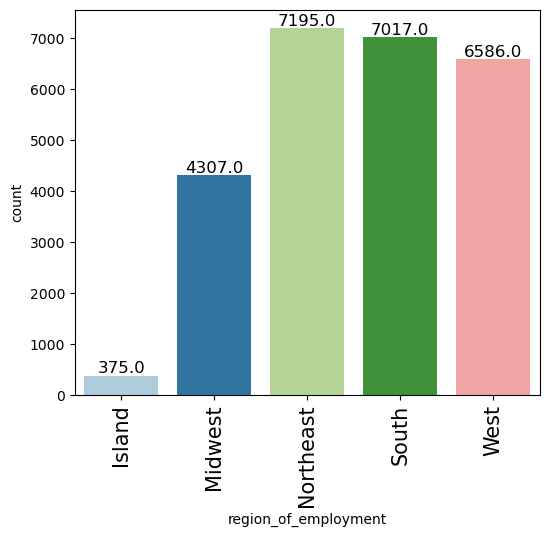

In [38]:
labeled_barplot(data, "region_of_employment")

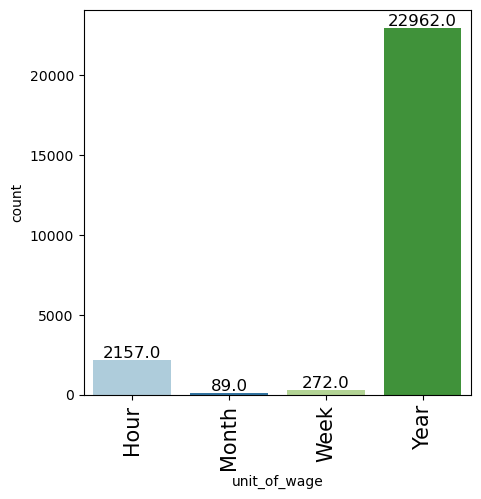

In [39]:
labeled_barplot(data, "unit_of_wage")

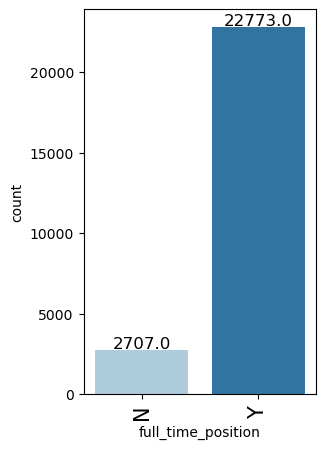

In [40]:
labeled_barplot(data, "full_time_position")

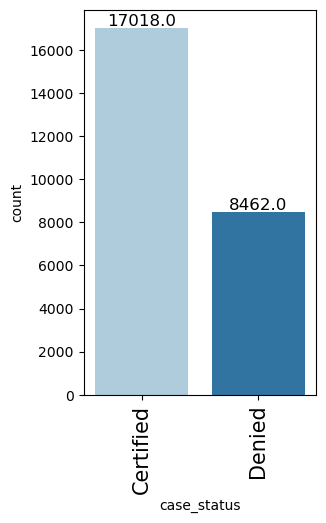

In [41]:
labeled_barplot(data, "case_status")

## BIVARIATE ANALYSIS

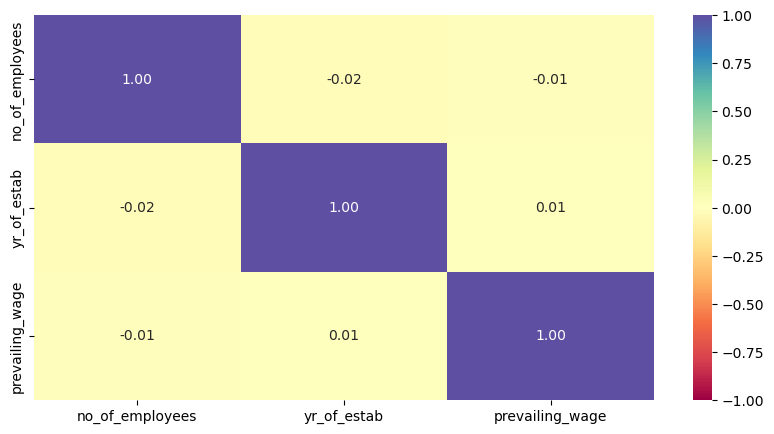

In [43]:
cols_list = data.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(10, 5))
sns.heatmap(
    data[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

In [44]:
# function to plot stacked bar chart

def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [45]:
# Function to plot distributions

def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

case_status            Certified  Denied    All
education_of_employee                          
All                        17018    8462  25480
Bachelor's                  6367    3867  10234
High School                 1164    2256   3420
Master's                    7575    2059   9634
Doctorate                   1912     280   2192
------------------------------------------------------------------------------------------------------------------------


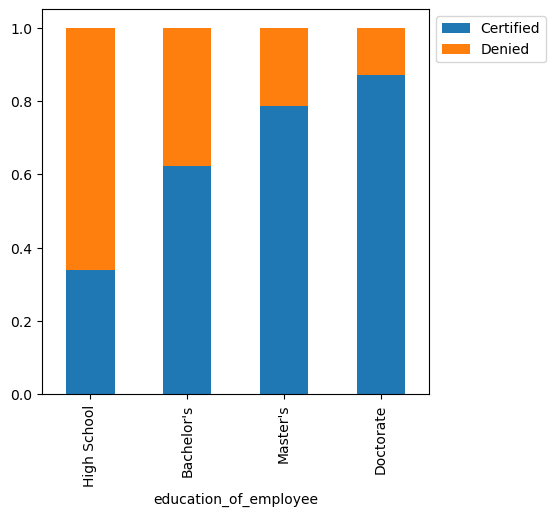

In [46]:
stacked_barplot(data,'education_of_employee','case_status')

case_status    Certified  Denied    All
continent                              
All                17018    8462  25480
Asia               11012    5849  16861
North America       2037    1255   3292
Europe              2957     775   3732
South America        493     359    852
Africa               397     154    551
Oceania              122      70    192
------------------------------------------------------------------------------------------------------------------------


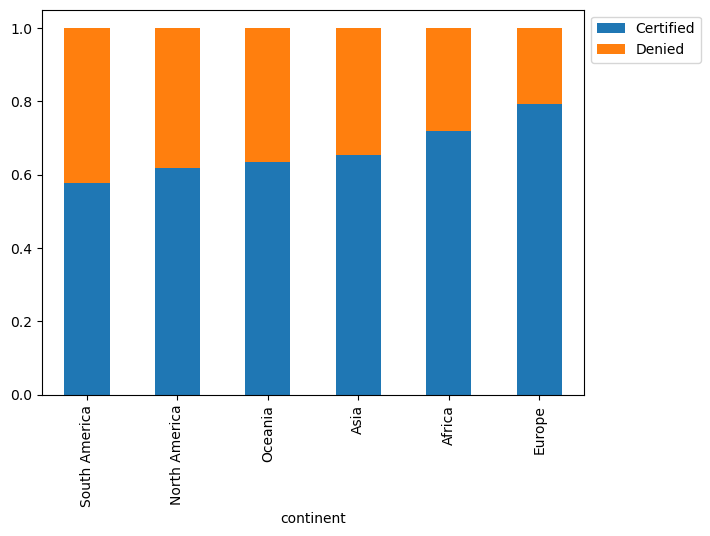

In [47]:
stacked_barplot(data,'continent','case_status')

education_of_employee  Bachelor's  Doctorate  High School  Master's    All
continent                                                                 
All                         10234       2192         3420      9634  25480
Asia                         7168        923         2290      6480  16861
Europe                       1299        846          490      1097   3732
North America                1225        258          401      1408   3292
South America                 333         89          137       293    852
Africa                        143         54           66       288    551
Oceania                        66         22           36        68    192
------------------------------------------------------------------------------------------------------------------------


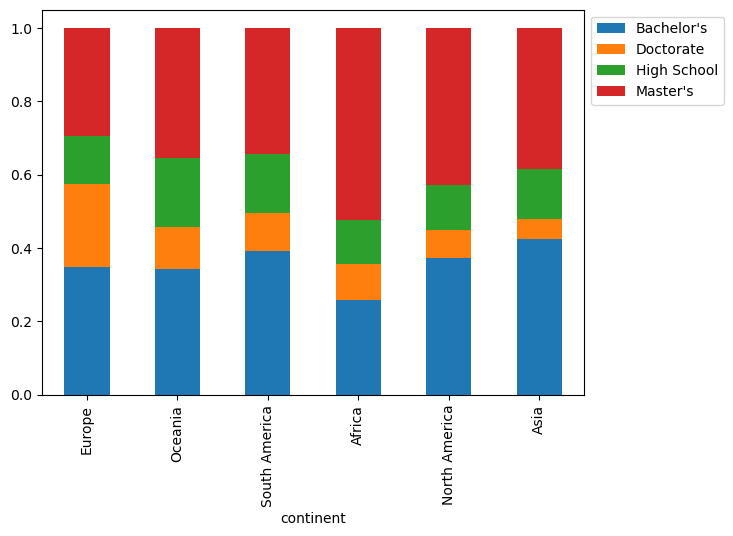

In [48]:
stacked_barplot(data, "continent", "education_of_employee")

case_status         Certified  Denied    All
has_job_experience                          
All                     17018    8462  25480
N                        5994    4684  10678
Y                       11024    3778  14802
------------------------------------------------------------------------------------------------------------------------


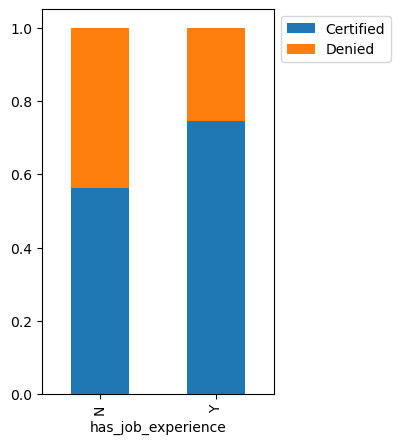

In [49]:
stacked_barplot(data,'has_job_experience','case_status')

case_status   Certified  Denied    All
unit_of_wage                          
All               17018    8462  25480
Year              16047    6915  22962
Hour                747    1410   2157
Week                169     103    272
Month                55      34     89
------------------------------------------------------------------------------------------------------------------------


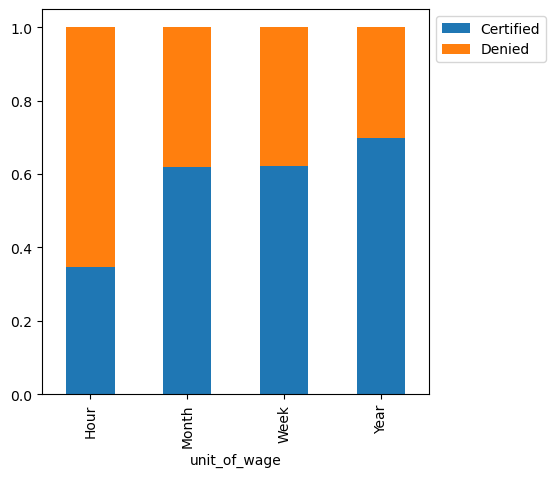

In [50]:
stacked_barplot(data,'unit_of_wage','case_status')

case_status         Certified  Denied    All
full_time_position                          
All                     17018    8462  25480
Y                       15163    7610  22773
N                        1855     852   2707
------------------------------------------------------------------------------------------------------------------------


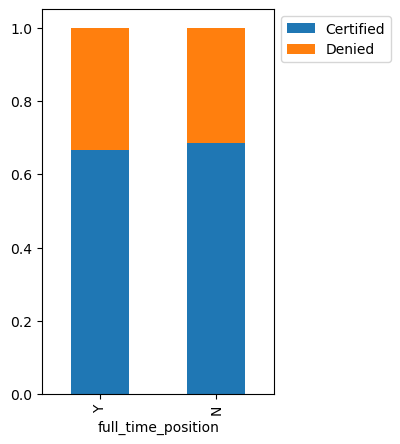

In [52]:
stacked_barplot(data, 'full_time_position','case_status')

## DATA PREPROCESSING

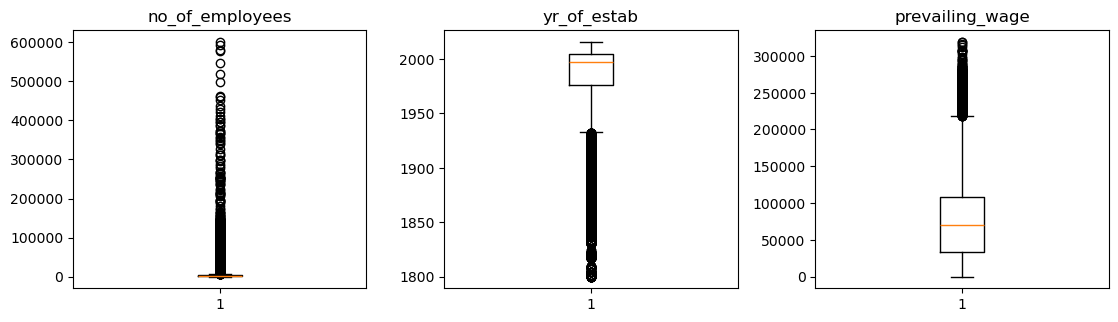

In [56]:
# outlier detection using boxplot
numeric_columns = data.select_dtypes(include=np.number).columns.tolist()


plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

In [65]:
data[data.no_of_employees<0].shape

(33, 11)

In [71]:
# negative values turned into absolute values
from numpy.ma.core import absolute
data['no_of_employees']=abs(data['no_of_employees'])

In [79]:
# Encoding Certified and Denied status to 1 and 0 respectively
data["case_status"].replace("Certified", 1, inplace=True)
data["case_status"].replace("Denied", 0, inplace=True)

In [81]:
# Create X and Y for modeling
X = data.drop(["case_status"], axis=1) 
y = data["case_status"]


# Splitting data into training, validation and test set:
# first we split data into 2 parts, say temporary and test

X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

# then we split the temporary set into train and validation

X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=1, stratify=y_temp)
print(X_train.shape, X_val.shape, X_test.shape)

(15288, 10) (5096, 10) (5096, 10)


In [83]:
X_train = pd.get_dummies(X_train, drop_first=True)
X_val = pd.get_dummies(X_val, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)
print(X_train.shape, X_val.shape, X_test.shape)

(15288, 21) (5096, 21) (5096, 21)


In [85]:
X_train.head()

,no_of_employees,yr_of_estab,prevailing_wage,continent_Asia,continent_Europe,continent_North America,continent_Oceania,continent_South America,education_of_employee_Doctorate,education_of_employee_High School,education_of_employee_Master's,has_job_experience_Y,requires_job_training_Y,region_of_employment_Midwest,region_of_employment_Northeast,region_of_employment_South,region_of_employment_West,unit_of_wage_Month,unit_of_wage_Week,unit_of_wage_Year,full_time_position_Y
5008,1020,2008,70919.850,True,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,True,True
12951,1624,2003,59082.940,False,True,False,False,False,False,False,True,True,True,False,True,False,False,False,False,True,True
3214,438,1991,22235.800,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,True
18876,211,1911,18937.370,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,True
21939,2696,2007,65906.820,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,True


## MODEL BUILDING

In [88]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [90]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

## MODEL BUILDING - ORIGINAL DATA

In [93]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("dtree", DecisionTreeClassifier(random_state=1, class_weight='balanced')))
models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))

print("\n" "Training Performance:" "\n")
for name, model in models:
    model.fit(X_train, y_train)
    scores = f1_score(y_train, model.predict(X_train))
    print("{}: {}".format(name, scores))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train, y_train)
    scores_val = f1_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores_val))


Training Performance:

Bagging: 0.989150179193873
Random forest: 1.0
GBM: 0.8291218182658106
Adaboost: 0.81941431670282
dtree: 1.0
Xgboost: 0.8949108348465801

Validation Performance:

Bagging: 0.7736516357206012
Random forest: 0.7993197278911565
GBM: 0.826637008202419
Adaboost: 0.8166485310119695
dtree: 0.7486033519553073
Xgboost: 0.8104410943606923


In [95]:
print("\nTraining and Validation Performance Difference:\n")

for name, model in models:
    model.fit(X_train, y_train)
    scores_train = f1_score(y_train, model.predict(X_train))
    scores_val = f1_score(y_val, model.predict(X_val))
    difference1 = scores_train - scores_val
    print("{}: Training Score: {:.4f}, Validation Score: {:.4f}, Difference: {:.4f}".format(name, scores_train, scores_val, difference1))


Training and Validation Performance Difference:

Bagging: Training Score: 0.9892, Validation Score: 0.7737, Difference: 0.2155
Random forest: Training Score: 1.0000, Validation Score: 0.7993, Difference: 0.2007
GBM: Training Score: 0.8291, Validation Score: 0.8266, Difference: 0.0025
Adaboost: Training Score: 0.8194, Validation Score: 0.8166, Difference: 0.0028
dtree: Training Score: 1.0000, Validation Score: 0.7486, Difference: 0.2514
Xgboost: Training Score: 0.8949, Validation Score: 0.8104, Difference: 0.0845


## MODEL BUILDING - OVERSAMPLED DATA

In [98]:
print("Before Oversampling, counts of label 'Certified': {}".format(sum(y_train == 1)))
print("Before Oversampling, counts of label 'Denied': {} \n".format(sum(y_train == 0)))

sm = SMOTE(
    sampling_strategy=1, k_neighbors=5, random_state=1
)  # Synthetic Minority Over Sampling Technique
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)


print("After Oversampling, counts of label 'Certified': {}".format(sum(y_train_over == 1)))
print("After Oversampling, counts of label 'Denied': {} \n".format(sum(y_train_over == 0)))


print("After Oversampling, the shape of train_X: {}".format(X_train_over.shape))
print("After Oversampling, the shape of train_y: {} \n".format(y_train_over.shape))

Before Oversampling, counts of label 'Certified': 10210
Before Oversampling, counts of label 'Denied': 5078 

After Oversampling, counts of label 'Certified': 10210
After Oversampling, counts of label 'Denied': 10210 

After Oversampling, the shape of train_X: (20420, 21)
After Oversampling, the shape of train_y: (20420,) 



In [100]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("dtree", DecisionTreeClassifier(random_state=1, class_weight='balanced')))
models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))

print("\n" "Training Performance:" "\n")
for name, model in models:
    model.fit(X_train_over, y_train_over)
    scores = f1_score(y_train_over, model.predict(X_train_over))
    print("{}: {}".format(name, scores))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train_over, y_train_over)
    scores = f1_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


Training Performance:

Bagging: 0.9875473741201949
Random forest: 0.9999510260051913
GBM: 0.8072434234901815
Adaboost: 0.7980933870146698
dtree: 1.0
Xgboost: 0.8708686342053813

Validation Performance:

Bagging: 0.7665171898355755
Random forest: 0.7965442764578834
GBM: 0.8173049645390071
Adaboost: 0.8117746957260119
dtree: 0.7320006012325266
Xgboost: 0.8129304286718201


In [101]:
print("\nTraining and Validation Performance Difference:\n")

for name, model in models:
    model.fit(X_train_over, y_train_over)
    scores_train = f1_score(y_train_over, model.predict(X_train_over))
    scores_val = f1_score(y_val, model.predict(X_val))
    difference2 = scores_train - scores_val
    print("{}: Training Score: {:.4f}, Validation Score: {:.4f}, Difference: {:.4f}".format(name, scores_train, scores_val, difference2))


Training and Validation Performance Difference:

Bagging: Training Score: 0.9875, Validation Score: 0.7665, Difference: 0.2210
Random forest: Training Score: 1.0000, Validation Score: 0.7965, Difference: 0.2034
GBM: Training Score: 0.8072, Validation Score: 0.8173, Difference: -0.0101
Adaboost: Training Score: 0.7981, Validation Score: 0.8118, Difference: -0.0137
dtree: Training Score: 1.0000, Validation Score: 0.7320, Difference: 0.2680
Xgboost: Training Score: 0.8709, Validation Score: 0.8129, Difference: 0.0579


## MODEL BUILDING - UNDERSAMPLED DATA

In [105]:
rus = RandomUnderSampler(random_state=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

In [107]:
print("Before Under Sampling, counts of label 'Certified': {}".format(sum(y_train == 1)))
print("Before Under Sampling, counts of label 'Denied': {} \n".format(sum(y_train == 0)))

print("After Under Sampling, counts of label 'Certified': {}".format(sum(y_train_un == 1)))
print("After Under Sampling, counts of label 'Denied': {} \n".format(sum(y_train_un == 0)))

print("After Under Sampling, the shape of train_X: {}".format(X_train_un.shape))
print("After Under Sampling, the shape of train_y: {} \n".format(y_train_un.shape))

Before Under Sampling, counts of label 'Certified': 10210
Before Under Sampling, counts of label 'Denied': 5078 

After Under Sampling, counts of label 'Certified': 5078
After Under Sampling, counts of label 'Denied': 5078 

After Under Sampling, the shape of train_X: (10156, 21)
After Under Sampling, the shape of train_y: (10156,) 



In [109]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("dtree", DecisionTreeClassifier(random_state=1, class_weight='balanced')))
models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))

print("\n" "Training Performance:" "\n")
for name, model in models:
    model.fit(X_train_un, y_train_un)
    scores = f1_score(y_train_un, model.predict(X_train_un))
    print("{}: {}".format(name, scores))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train_un, y_train_un)
    scores = f1_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


Training Performance:

Bagging: 0.9803687095166915
Random forest: 1.0
GBM: 0.7281441717791411
Adaboost: 0.7051306873184898
dtree: 1.0
Xgboost: 0.8720351390922401

Validation Performance:

Bagging: 0.7057046979865772
Random forest: 0.7417218543046358
GBM: 0.776595744680851
Adaboost: 0.7619499841722064
dtree: 0.6955818093542644
Xgboost: 0.7459304181295883


In [111]:
print("\nTraining and Validation Performance Difference:\n")

for name, model in models:
    model.fit(X_train_un, y_train_un)
    scores_train = f1_score(y_train_un, model.predict(X_train_un))
    scores_val = f1_score(y_val, model.predict(X_val))
    difference3 = scores_train - scores_val
    print("{}: Training Score: {:.4f}, Validation Score: {:.4f}, Difference: {:.4f}".format(name, scores_train, scores_val, difference3))


Training and Validation Performance Difference:

Bagging: Training Score: 0.9804, Validation Score: 0.7057, Difference: 0.2747
Random forest: Training Score: 1.0000, Validation Score: 0.7417, Difference: 0.2583
GBM: Training Score: 0.7281, Validation Score: 0.7766, Difference: -0.0485
Adaboost: Training Score: 0.7051, Validation Score: 0.7619, Difference: -0.0568
dtree: Training Score: 1.0000, Validation Score: 0.6956, Difference: 0.3044
Xgboost: Training Score: 0.8720, Validation Score: 0.7459, Difference: 0.1261


## MODEL TUNING

In [114]:
%%time

# defining model
model = XGBClassifier(random_state=1,eval_metric='logloss')

# Parameter grid to pass in RandomizedSearchCV
param_grid={'n_estimators':np.arange(50,150,50),
            'scale_pos_weight':[2,5,10],
            'learning_rate':[0.01,0.1,0.2,0.05],
            'gamma':[0,1,3,5],
            'subsample':[0.8,0.9,1],
            'max_depth':np.arange(1,5,1),
            'reg_lambda':[5,10]}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

#Calling RandomizedSearchCV
xgb_tuned2 = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=100, scoring=scorer, cv=5, random_state=1, n_jobs = -1)

#Fitting parameters in RandomizedSearchCV
xgb_tuned2.fit(X_train_over,y_train_over)

print("Best parameters are {} with CV score={}:" .format(xgb_tuned2.best_params_,xgb_tuned2.best_score_))

Best parameters are {'subsample': 0.9, 'scale_pos_weight': 2, 'reg_lambda': 5, 'n_estimators': 100, 'max_depth': 4, 'learning_rate': 0.2, 'gamma': 0} with CV score=0.8113270404813864:
CPU times: total: 2.92 s
Wall time: 7.5 s


In [116]:
# building model with best parameters
xgb_tuned2 = XGBClassifier(
    random_state=1,
    n_estimators=100,
    scale_pos_weight=2,
    gamma=0,
    subsample=0.9,
    learning_rate=0.2,
    eval_metric="logloss",
    max_depth=4,
    reg_lambda=5,
)
# Fit the model on training data
xgb_tuned2.fit(X_train_over, y_train_over)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=0, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.2, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=4,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, random_state=1, ...)

In [118]:
# Calculating different metrics on train set
xgboost_random_train = model_performance_classification_sklearn(
    xgb_tuned2, X_train_over, y_train_over
)
print("Training performance:")
xgboost_random_train

Training performance:


,Accuracy,Recall,Precision,F1
0,0.784,0.956,0.712,0.816


In [120]:
# Calculating different metrics on validation set
xgboost_random_val = model_performance_classification_sklearn(xgb_tuned2, X_val, y_val)
print("Validation performance:")
xgboost_random_val

Validation performance:


,Accuracy,Recall,Precision,F1
0,0.725,0.941,0.728,0.820


In [122]:
%%time

#defining model
Model = GradientBoostingClassifier(random_state=1)

#Parameter grid to pass in RandomSearchCV
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "subsample":[0.7,0.9],
    "max_features":[0.5,0.7,1],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

#Calling RandomizedSearchCV
gbm_tuned = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=100, scoring=scorer, cv=5, random_state=1, n_jobs = -1)
#Fitting parameters in RandomizedSearchCV
gbm_tuned.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(gbm_tuned.best_params_,gbm_tuned.best_score_))

Best parameters are {'subsample': 0.9, 'n_estimators': 50, 'max_features': 0.5, 'learning_rate': 0.1, 'init': AdaBoostClassifier(random_state=1)} with CV score=0.8249419046171683:
CPU times: total: 3.08 s
Wall time: 27.4 s


In [124]:
tuned_gbm = GradientBoostingClassifier(
    random_state=1,
    subsample=0.9,
    n_estimators=50,
    max_features=0.5,
    learning_rate=0.1,
    init=AdaBoostClassifier(random_state=1),
)
tuned_gbm.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.5, n_estimators=50, random_state=1,
                           subsample=0.9)

In [126]:
# Checking model's performance on training set
gbm_train = model_performance_classification_sklearn(
    tuned_gbm, X_train, y_train
)
print("Training performance:")
gbm_train

Training performance:


,Accuracy,Recall,Precision,F1
0,0.754,0.884,0.778,0.828


In [128]:
# Checking model's performance on validation set
gbm_val = model_performance_classification_sklearn(tuned_gbm, X_val, y_val)
print("Validation performance:")
gbm_val

Validation performance:


,Accuracy,Recall,Precision,F1
0,0.753,0.880,0.779,0.827


In [130]:
%%time

# defining model
Model = AdaBoostClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": np.arange(10, 40, 10),
    "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "estimator": [
        DecisionTreeClassifier(max_depth=1, random_state=1),
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

#Calling RandomizedSearchCV
adb_tuned = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_jobs = -1, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
adb_tuned.fit(X_train, y_train)

print("Best parameters are {} with CV score={}:" .format(adb_tuned.best_params_,adb_tuned.best_score_))

Best parameters are {'n_estimators': 20, 'learning_rate': 0.2, 'estimator': DecisionTreeClassifier(max_depth=3, random_state=1)} with CV score=0.8237064611845593:
CPU times: total: 1.06 s
Wall time: 5.12 s


In [132]:
tuned_adb = AdaBoostClassifier(
    random_state=1,
    n_estimators=20,
    learning_rate=0.2,
    estimator=DecisionTreeClassifier(max_depth=2, random_state=1),
)
tuned_adb.fit(X_train, y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=2,
                                                    random_state=1),
                   learning_rate=0.2, n_estimators=20, random_state=1)

In [134]:
# Checking model's performance on training set
adb_train = model_performance_classification_sklearn(tuned_adb, X_train, y_train)
print("Training performance:")
adb_train

Training performance:


,Accuracy,Recall,Precision,F1
0,0.733,0.911,0.745,0.820


In [136]:
# Checking model's performance on validation set
adb_val = model_performance_classification_sklearn(tuned_adb, X_val, y_val)
print("Validation performance:")
adb_val

Validation performance:


,Accuracy,Recall,Precision,F1
0,0.737,0.912,0.749,0.822


## MODEL PERFORMANCE COMPARISON & FINAL MODEL SELECTION

In [138]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        xgboost_random_train.T,
        gbm_train.T,
        adb_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "XG boosting trained with Oversampled data",
    "Gradient boosting trained with Original data",
    "AdaBoost trained with Original data",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,XG boosting trained with Oversampled data,Gradient boosting trained with Original data,AdaBoost trained with Original data
Accuracy,0.784,0.754,0.733
Recall,0.956,0.884,0.911
Precision,0.712,0.778,0.745
F1,0.816,0.828,0.820


In [140]:
# Validation performance comparison

models_train_comp_df = pd.concat(
    [ 
        xgboost_random_val.T,
        gbm_val.T,
        adb_val.T,
    ],
    axis=1,)
models_train_comp_df.columns = [
    "XG boosting trained with Oversampled data",
    "Gradient boosting trained with Original data",
    "AdaBoost trained with Original data",
]
print("Validation performance comparison:")
models_train_comp_df

Validation performance comparison:


,XG boosting trained with Oversampled data,Gradient boosting trained with Original data,AdaBoost trained with Original data
Accuracy,0.725,0.753,0.737
Recall,0.941,0.880,0.912
Precision,0.728,0.779,0.749
F1,0.820,0.827,0.822


In [160]:
# Let's check the performance on test set
adaboost_test = model_performance_classification_sklearn(gbm_tuned, X_test, y_test)
print("Testing performance:")
adaboost_test

Testing performance:


,Accuracy,Recall,Precision,F1
0,0.741,0.877,0.768,0.819


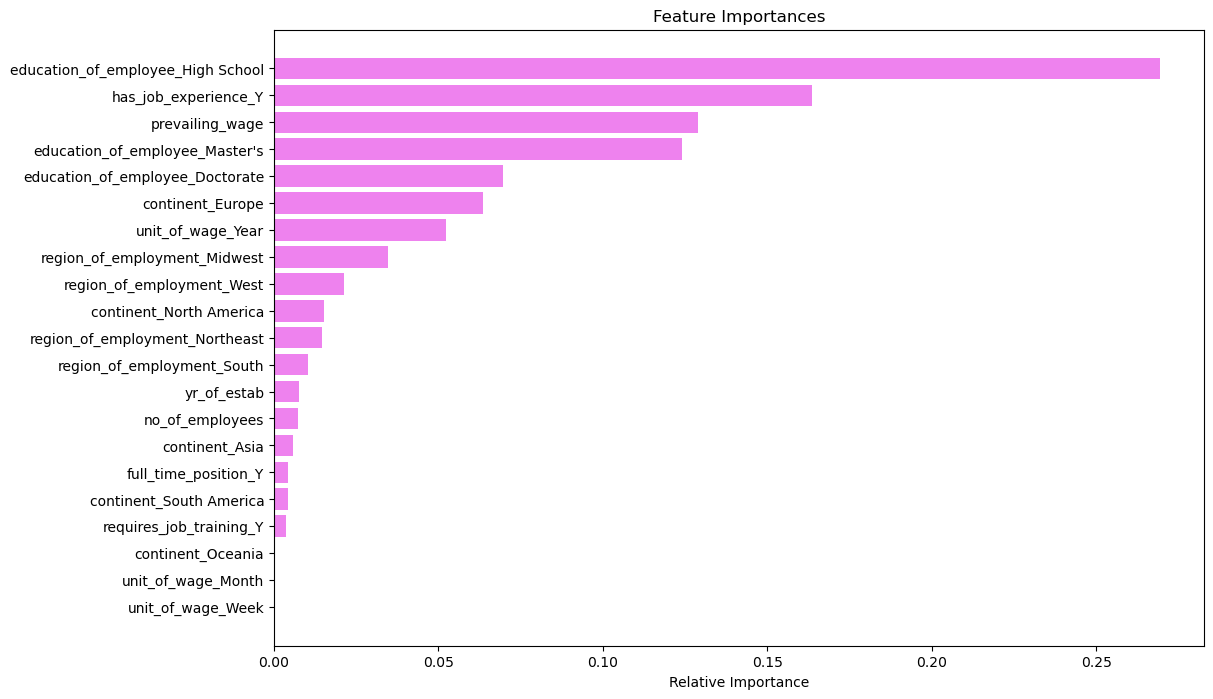

In [162]:
feature_names = X_train.columns
importances = gbm_tuned.best_estimator_.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()